<a href="https://colab.research.google.com/github/amandahaff/MAT422/blob/main/4_2_HW_Haffner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spectral graph bipartitioning

Graph partition aims to find out a partition such that the cut (the total
number of edges between two disjoint sets of nodes) is minimized.

In [4]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

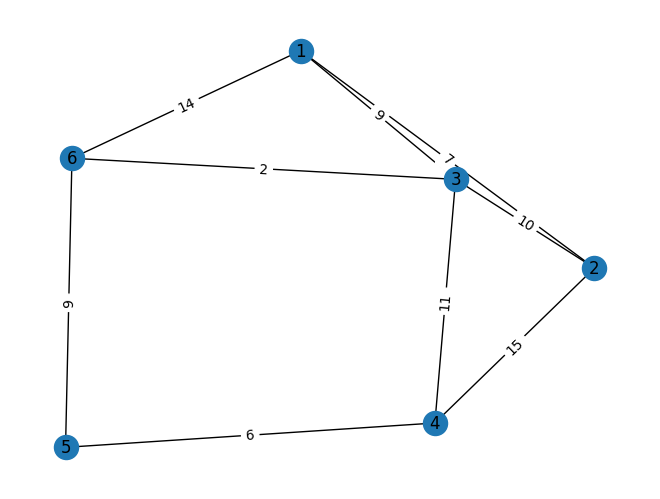

In [5]:
# Create a weighted graph
G = nx.Graph()
G.add_weighted_edges_from([
  (1, 2, 7),
  (1, 3, 9),
  (1, 6, 14),
  (2, 3, 10),
  (2, 4, 15),
  (3, 4, 11),
  (3, 6, 2),
  (4, 5, 6),
  (5, 6, 9),
])
pos = nx.spring_layout(G)

nx.draw(G, pos, with_labels=True)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.show()

In [6]:
# Create the Laplacian matrix
L = nx.laplacian_matrix(G)
L = L.todense()
print("Laplacian Matrix:\n", L)

Laplacian Matrix:
 [[ 30  -7  -9 -14   0   0]
 [ -7  32 -10   0 -15   0]
 [ -9 -10  32  -2 -11   0]
 [-14   0  -2  25   0  -9]
 [  0 -15 -11   0  32  -6]
 [  0   0   0  -9  -6  15]]


In [7]:
# Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(L)

# Sort the eigenvalues and eigenvectors
idx = eigenvalues.argsort()

# Get the first eigenvector
eigenvector = eigenvectors[:, idx[1]]

print("Eigenvector:\n", eigenvector)
print("Eigenvalues:\n", eigenvalues)

Eigenvector:
 [-0.02017232 -0.41210333 -0.34576895  0.40284199 -0.30103844  0.67624104]
Eigenvalues:
 [-1.42108547e-14  5.02860353e+01  4.34248026e+01  4.10193145e+01
  1.89602304e+01  1.23096172e+01]


In [8]:
# Get the partition vector
partition_vector = np.sign(eigenvector)
print(partition_vector)

[-1. -1. -1.  1. -1.  1.]
